# Trabajo práctica n°1
Se realizará un EDA sobre el csv de properati, para preparar los datos para realizar luego un modelo de predicción de precios.
El Dataset se encuentra en: https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view?resourcekey=0-4m-28Uq6kWRDBrt2NXFbNQ

---
---
## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

---
---
## Carga de datos y primer análisis

In [2]:
# Agregar el archivo en la carpeta Data. Ya agregué en el .gitignore que no suba al repositorio nada de la carpeta esa.
location = 'Data/properati.csv'
data = pd.read_csv(location, index_col=0)

In [3]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


---
### Análisis general de columnas

In [4]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


---
#### Datos nulos:

In [5]:
no_nulos = data.notnull().sum()
no_nulos_porcentual = no_nulos/(data.shape[0])*100
print(data.info())
print('\nPorcentaje de datos no nulos:\n\n', no_nulos_porcentual)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

---
#### Chequeo de filas duplicadas
Sólo chequee que sean duplicadas completas, no por ejemplo un análisis más profundo para ver si se repite la misma casa

In [6]:
data.duplicated().sum()

0

---
#### Valores de columnas categóricas:
Las columnas `description`, `title`, `image_thumbnail` y `properati_url` tienen valores muy variados por lo que no las analizamos de esta manera

In [7]:
data['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [8]:
data['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [9]:
data['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [10]:
data['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [11]:
print('Cantidad de place_name diferentes: ', len(data.place_name.unique()))
data['place_name'].value_counts()

Cantidad de place_name diferentes:  1061


Córdoba                9254
Rosario                8504
Mar del Plata          6534
Tigre                  3324
Nordelta               3315
                       ... 
Villa Ventana             1
Bosques                   1
Villa Larca               1
Capilla del Rosario       1
Pampa del Infierno        1
Name: place_name, Length: 1060, dtype: int64

In [12]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

---
#### Correlación entre columnas

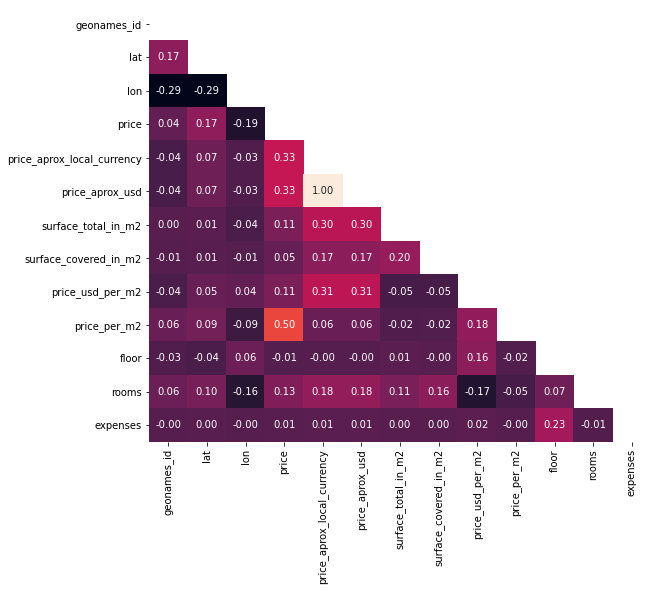

In [13]:
plt.figure(figsize=(9,8))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cbar=False)
plt.show()

---
### Primeras conclusiones:
- Sólo se incluyen ventas.
- geonames_id tiene alguna correspondencia con el place_name
- floor, no sabemos a que corresponde, puede ser cantidad de pisos, o en que piso se ubica
- Hay tres de currencies que no tienen sentido
- Hay 4 tipos de propiedades
- Hay propiedades de toda Argentina, pero sólo de Argentina
- La columna place_name incluye barrios pero también, al menos, ciudades enteras en algunos casos
- Existen muchos datos faltantes en el dataset
- La columna de price_local_currency probablemente es una conversión directa de price_aprox_usd o viceversa

---
---
## Tratamiento de columnas

### Regex
Utilizamos Regex en la columna `description` para rastrear valores faltantes y generar nuevas features

In [14]:
# Buscamos datos directos de superficie, cantidad de ambientes, si son duplex, tienen balcón, patio o planta alta
patron_duplex = '(?P<m2>\d\d\d+\s\s*m2|M2)|(?P<ambiente>\d+\sambiente|\d+\sAMBIENTE)|(?P<balcon>balcon|BALCON)|(?P<planta_alta>planta\salta|PLANTA\sALTA)|(?P<patio>patio|PATIO)|(?P<duplex>duplex|DUPLEX)'
patron_duplex_regex = re.compile(patron_duplex)
data_duplex_match = data.description.apply(lambda x : patron_duplex_regex.search(str(x)))

data_m2 = data_duplex_match.apply(lambda x: x if x is None else x.group('m2'))

data_ambientes = data_duplex_match.apply(lambda x: x if x is None else x.group('ambiente'))

# Extraigo los datos. Actualmente no los usamos posteriormente, pero son datos útiles a profundizar
data_balcon = data_duplex_match.apply(lambda x: x if x is None else x.group('balcon'))
data_patio = data_duplex_match.apply(lambda x: x if x is None else x.group('patio'))
data_duplex = data_duplex_match.apply(lambda x: x if x is None else x.group('duplex'))
data_planta_alta = data_duplex_match.apply(lambda x: x if x is None else x.group('planta_alta'))

#Creación de data frame con regex
data_regex_df = pd.DataFrame({'data_m2':data_m2,'data_ambientes': data_ambientes, 'data_balcon': data_balcon,'data_patio': data_patio, 'data_duplex': data_duplex, 'data_planta_alta': data_planta_alta})
data_regex = pd.concat([data_regex_df, data.property_type,data.rooms, data.surface_covered_in_m2, data.surface_total_in_m2], axis=1)



Limpiamos los datos obtenidos, dejando sólo el valor

In [15]:
#metros cuadrados
m2_ = '(?P<num>\d+)'
m2_regex = re.compile(m2_)
data_m2_re = data_m2.apply(lambda x: x if x is None else m2_regex.search(x))
data_m2_re_num = data_m2_re.apply(lambda x: x if x is None else x.group('num'))
 
#ambientes
amb_ = '(?P<amb>\d+)'
amb_regex = re.compile(amb_)
data_amb_re = data_ambientes.apply(lambda x: x if x is None else amb_regex.search(x))
data_amb_re_num = data_amb_re.apply(lambda x: 0 if x is None else x.group('amb'))

data_m2_re_mach = data_m2_re.apply(lambda x: 0 if x is None else x.group('num'))
pd.to_numeric(data_m2_re_mach)
pd.to_numeric(data_amb_re_num)
data_m2_re_mach.astype(int)
data_regex['data_m2'] = data_m2_re_mach
data_regex['data_ambientes'] = data_amb_re_num


In [16]:
#Máscaras sup nulos
mask_sup_cov_ = pd.isnull(data.surface_covered_in_m2)
mask_sup_tot = pd.isnull(data.surface_total_in_m2)
mask_m2 = pd.notnull(data_regex.data_m2) > 0

In [17]:
# Función que completa datos faltantes de superficie con datos extraídos de la descripción.
def compl_m2_re (row):
    if row['surface_covered_in_m2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        result = row['data_m2']
    return result

data_regex['surface_covered_in_m2_2'] = data_regex.apply(compl_m2_re, axis = 1)


### Creación de columnas relevantes
Se detectan las descripciones que incluyen la palabra cuotas en la descripción. Esto indica que el precio indicado es parte de un plan de cuotas, y no el completo. 


In [18]:
# regex de detección de cuotas en la descripción, para generar nuevo Feature

pattern_cuota = '.*cuota.*'
re_cuota = re.compile(pattern_cuota)
match_cuota = data['description'].apply(lambda x: np.NaN if x is np.NaN else re_cuota.match(x))\
                                 .isna()

data.loc[:,'cuotas'] = match_cuota
print('Cantidad de registros que incluyen la palabra "cuotas": ',len(match_cuota) - match_cuota.sum())

Cantidad de registros que incluyen la palabra "cuotas":  7198


In [19]:
data_regex['data_ambientes']

0         2
1         0
2         2
3         3
4         0
         ..
121215    0
121216    0
121217    0
121218    0
121219    0
Name: data_ambientes, Length: 121220, dtype: object

In [20]:
# También creamos la columna de ambientes sacada del primer Regex de esta sección. Si dice 0 ambientes es que no se tiene el dato
data['ambientes'] = data_regex['data_ambientes']
print('Cantidad de registros de cada número de ambientes\n', data['ambientes'].value_counts())
#Hay varios valores que obviamente son erróneos, luego se hará un chequeo de los mismos, mejorando el regex o reimputando outilers

Cantidad de registros de cada número de ambientes
 0              92121
2               9828
3               9440
4               5314
1               2237
5               1540
6                436
7                180
8                 23
9                 16
9502              12
11                10
10                 7
006                3
18                 3
23                 3
0002               3
14                 3
42004              3
1200               2
24                 2
12                 2
183                1
22                 1
562                1
0001               1
42028              1
853                1
42015              1
42054              1
28612              1
2017               1
281                1
42021              1
20173              1
25                 1
22330489662        1
2004               1
42049              1
442                1
412                1
42024              1
20192              1
192                1
42026              1
153 

---
### Análisis de Outliers

In [21]:
# Extraemos los lugares con más de 100 registros para cada tipo de propiedad
grouped_place_name = data.groupby(['property_type','place_name'])['operation']\
                         .count()\
                         .sort_values(ascending=False)\
                         .reset_index()
mask_mas_de_100 = grouped_place_name['operation'] > 100

mask_place_name_ph = grouped_place_name[(grouped_place_name['property_type'] == 'PH')]
mask_place_name_apartment = grouped_place_name[(grouped_place_name['property_type'] == 'apartment')]
mask_place_name_house = grouped_place_name[(grouped_place_name['property_type'] == 'house')]
mask_place_name_store = grouped_place_name[(grouped_place_name['property_type'] == 'store')]

mask_place_name_relevantes_ph_100 =  mask_place_name_ph[mask_mas_de_100]
mask_place_name_apartment_100 =  mask_place_name_apartment[mask_mas_de_100]
mask_place_name_relevantes_apartment_700 = mask_place_name_apartment[grouped_place_name['operation'] > 700]
mask_place_name_house_100 = mask_place_name_house[mask_mas_de_100]
mask_place_name_relevantes_house_400 = mask_place_name_house[grouped_place_name['operation'] > 400]
mask_place_name_relevantes_store_100 = mask_place_name_store[mask_mas_de_100]

place_name_relevantes_ph_100 = data[(data['place_name'].isin(mask_place_name_relevantes_ph_100['place_name'])) & (data['property_type'] == 'PH')]
place_name_relevantes_apartment_100 = data[(data['place_name'].isin(mask_place_name_apartment_100['place_name'])) & (data['property_type'] == 'apartment')]
place_name_relevantes_apartment_700 = data[(data['place_name'].isin(mask_place_name_relevantes_apartment_700['place_name'])) & (data['property_type'] == 'apartment')]
place_name_relevantes_house_100 = data[(data['place_name'].isin(mask_place_name_house_100['place_name'])) & (data['property_type'] == 'house')]
place_name_relevantes_house_400 = data[(data['place_name'].isin(mask_place_name_relevantes_house_400['place_name'])) & (data['property_type'] == 'house')]
place_name_relevantes_store_100 = data[(data['place_name'].isin(mask_place_name_relevantes_store_100['place_name'])) & (data['property_type'] == 'store')]


print(f"Cantidad de places ph con más de 100 registros: {len(place_name_relevantes_ph_100['place_name'].unique())}")
print(f"Cantidad de places apartment con más de 100 registros: {len(place_name_relevantes_apartment_100['place_name'].unique())}")
print(f"Cantidad de places apartment con más de 700 registros: {len(place_name_relevantes_apartment_700['place_name'].unique())}")
print(f"Cantidad de places house con más de 100 registros: {len(place_name_relevantes_house_100['place_name'].unique())}")
print(f"Cantidad de places house con más de 400 registros: {len(place_name_relevantes_house_400['place_name'].unique())}")
print(f"Cantidad de places stores con más de 100 registros: {len(place_name_relevantes_store_100['place_name'].unique())}")

C:\Users\alanp\AppData\Local\Temp/ipykernel_17052/112239971.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask_place_name_relevantes_ph_100 =  mask_place_name_ph[mask_mas_de_100]
C:\Users\alanp\AppData\Local\Temp/ipykernel_17052/112239971.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask_place_name_apartment_100 =  mask_place_name_apartment[mask_mas_de_100]
C:\Users\alanp\AppData\Local\Temp/ipykernel_17052/112239971.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask_place_name_relevantes_apartment_700 = mask_place_name_apartment[grouped_place_name['operation'] > 700]
C:\Users\alanp\AppData\Local\Temp/ipykernel_17052/112239971.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask_place_name_house_100 = mask_place_name_house[mask_mas_de_100]
C:\Users\alanp\AppData\Local\Temp/ipykernel_17052/112239971.py:17: UserWarning: Boolean Series k

Cantidad de places ph con más de 100 registros: 10
Cantidad de places apartment con más de 100 registros: 102
Cantidad de places apartment con más de 700 registros: 21
Cantidad de places house con más de 100 registros: 78
Cantidad de places house con más de 400 registros: 18
Cantidad de places stores con más de 100 registros: 6


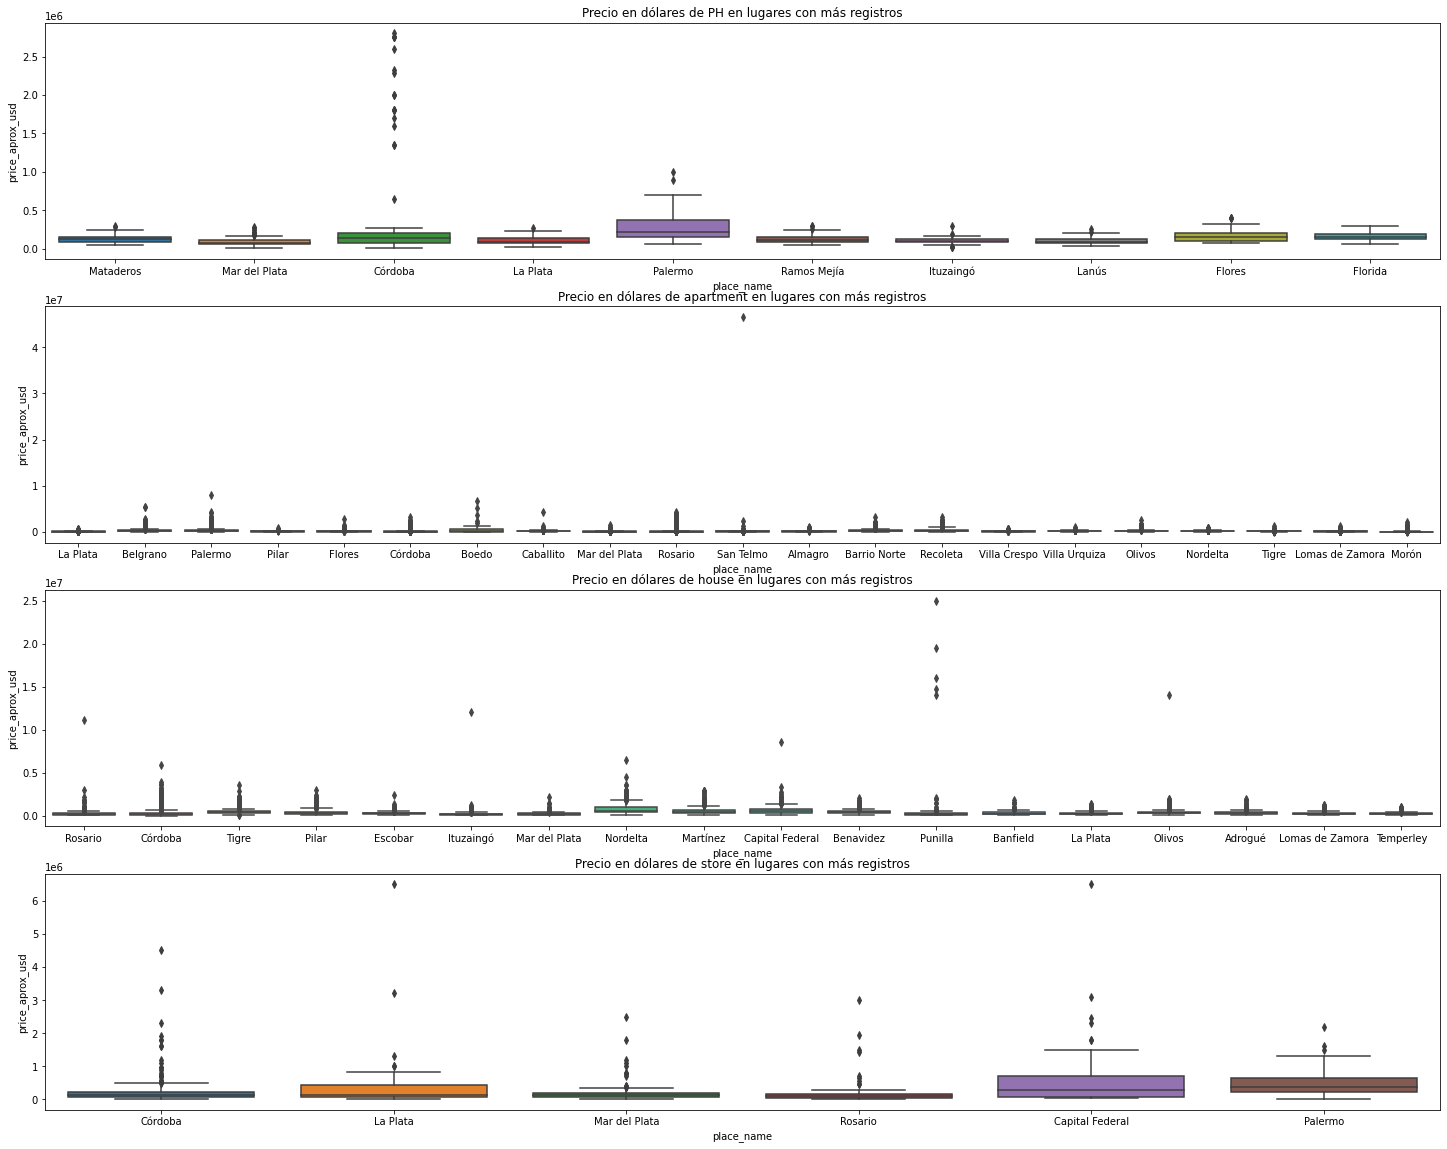

In [22]:
# visualización de boxplot de los precios en dólares de los lugares con más datos, separados por tipo de propiedad
property_types = list(data['property_type'].unique())
place_name_boxplot_list = [place_name_relevantes_ph_100,place_name_relevantes_apartment_700,place_name_relevantes_house_400,place_name_relevantes_store_100]


fig, axs = plt.subplots(4,1,figsize=(25,20))
for i, property_type in enumerate(property_types):
    bp_precio_usd = sns.boxplot(y='price_aprox_usd',x='place_name', data= place_name_boxplot_list[i], ax=axs[i])

    bp_precio_usd.set_title(f'Precio en dólares de {property_type} en lugares con más registros')
plt.show()

#### Análisis:
- Hay muchos lugares con más de 100 registros de casas y departamentos.
- Se observan algunos outliers para analizar, puede deberse a que son erróneos, o que son propiedades fuera de lo común.

In [23]:
# Calculo manual de outliers.
# Falta agregar como mínimo el criterio de place_name, supongo que un loop para cada entrada unica de place_name y una máscara extra
place_name_relevantes_100_list = [place_name_relevantes_ph_100,place_name_relevantes_apartment_100, place_name_relevantes_house_100, place_name_relevantes_store_100] 
outliers_precio_usd = []
for i, place in enumerate(place_name_relevantes_100_list):

    Q1_precio_usd = place['price_aprox_usd'].quantile(0.25)
    Q3_precio_usd = place['price_aprox_usd'].quantile(0.75)
    RIQ_precio_usd = Q3_precio_usd - Q1_precio_usd
    print(property_types[i], '\nQ1: $', Q1_precio_usd,'\nQ3: $', Q3_precio_usd,'\nRIQ: $', RIQ_precio_usd)
    outlier_precio_min = Q1_precio_usd-1.5*RIQ_precio_usd
    outlier_precio_max = Q3_precio_usd+1.5*RIQ_precio_usd
    print('\nMínimo para considerar Outlier: $',outlier_precio_min, '\nMáximo para considerar Outlier: $', outlier_precio_max)

    mask_outlier_sup_usd = place['price_aprox_usd'] > (outlier_precio_max)
    print('\nOutliers superiores:')
    display(mask_outlier_sup_usd.value_counts())
    mask_outlier_inf_usd = place['price_aprox_usd'] < (outlier_precio_min)
    print('\nOutliers inferiores:')
    display(mask_outlier_inf_usd.value_counts())
    
    outliers_df = place[(mask_outlier_sup_usd) | (mask_outlier_inf_usd)]
    print('\nMínimo valor en dataset de outlier: ', outliers_df['price_aprox_usd'].min())
    outliers_precio_usd.append(outliers_df)
    print('\n\n')
    
# queda outliers_precio_usd como una lista con los cuatro dataframes con los índices de outliers. Se deben eliminar estos registros del dataset original. 
# Esto se puede convertir en una función (el parámetro sería el string de la columna), y que retorne la lista de DFs. 
# Esto serviría para poder eliminar según las demás columnas que consideremos.

PH 
Q1: $ 75000.0 
Q3: $ 150000.0 
RIQ: $ 75000.0

Mínimo para considerar Outlier: $ -37500.0 
Máximo para considerar Outlier: $ 262500.0

Outliers superiores:


False    1717
True       83
Name: price_aprox_usd, dtype: int64


Outliers inferiores:


False    1800
Name: price_aprox_usd, dtype: int64


Mínimo valor en dataset de outlier:  265000.0



apartment 
Q1: $ 81321.33 
Q3: $ 198000.0 
RIQ: $ 116678.67

Mínimo para considerar Outlier: $ -93696.675 
Máximo para considerar Outlier: $ 373018.005

Outliers superiores:


False    59709
True      5190
Name: price_aprox_usd, dtype: int64


Outliers inferiores:


False    64899
Name: price_aprox_usd, dtype: int64


Mínimo valor en dataset de outlier:  373034.46



house 
Q1: $ 149000.0 
Q3: $ 390000.0 
RIQ: $ 241000.0

Mínimo para considerar Outlier: $ -212500.0 
Máximo para considerar Outlier: $ 751500.0

Outliers superiores:


False    26399
True      1657
Name: price_aprox_usd, dtype: int64


Outliers inferiores:


False    28056
Name: price_aprox_usd, dtype: int64


Mínimo valor en dataset de outlier:  760000.0



store 
Q1: $ 71506.68 
Q3: $ 349500.0 
RIQ: $ 277993.32

Mínimo para considerar Outlier: $ -345483.3 
Máximo para considerar Outlier: $ 766489.98

Outliers superiores:


False    985
True      64
Name: price_aprox_usd, dtype: int64


Outliers inferiores:


False    1049
Name: price_aprox_usd, dtype: int64


Mínimo valor en dataset de outlier:  780000.0





#### Conclusiones:
- Con el cálculo de outliers se pueden eliminar los registros de los puntos que consideremos outliers, según el criterio que usan los boxplot.
- Se debe hacer un análisis más profundo para definir si son considerados outliers, o son datos relevantes. 

---
### Análisis de las features de precios
#### Chequeo de tipos de currency

In [24]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

#### Análisis:  
- Casi todas las operaciones son en pesos o dólares. 
- Se observan 3 operaciones en otras monedas. PEN = soles peruanos y UYU = Pesos uruguayos.  
- Chequeamos estos tres datos únicos para ver su válidez y si pueden convertirse correctamente a dólares

In [25]:
data[(data['currency'] == 'PEN') | (data['currency'] == 'UYU')][['place_with_parent_names','geonames_id','price','currency','price_aprox_local_currency',\
                                                                 'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]

,place_with_parent_names,geonames_id,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
50387,|Argentina|Capital Federal|,3433955.0,380000.0,PEN,2.066865e+06,117139.33,NaN,NaN,NaN,NaN
50388,|Argentina|Capital Federal|,3433955.0,950000.0,PEN,5.167162e+06,292848.33,NaN,NaN,NaN,NaN
107390,|Argentina|Mendoza|San Roque|,3836586.0,650000000.0,UYU,4.054773e+08,22980378.29,NaN,NaN,NaN,NaN


In [26]:
# Veo las descripciones de estos tres datos para ver si me aportan información
print('Descripción de id 50387:\n ', data.loc[50387,'description'])
print('')
print('Descripción de id 50388:\n ', data.loc[50388,'description'])
print('')
print('Descripción de id 107390:\n ', data.loc[107390,'description'])

Descripción de id 50387:
  Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a entregarse en 20 meses de 47m2, pequeño patio. Con todos los artefactos.- Departamento de 1 dormitorios con patio, cochera y parrilla ENTREGA: $380.000 + 24 cuotas de $24.000 ( ) Departamento de 1 dormitorio con patio, sin cochera ENTREGA: $350.000 + 24 cuotas de $22.000 (  ) (  ) Cuotas ajustadas al Indice de la Construcción.-  

Descripción de id 50388:
  Ref.: 56Duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u Hay 3 departamentos en venta, todos con cocina, termotanque y calefactores. 

Descripción de id 107390:
  Casa con Calefacción central, Mendoza, San Roque, por $ 650.000.000


#### Conclusiones:  
- En los dos con soles peruanos se podría imputar el área, y la conversión a dólares es la misma (apox 3.24PER = 1USD en vez de 3.84PER = 1USD que dice google).
- Index 50387 y 50388, usar las otras dos columnas para cambiar el valor de la columna 'precio'. Considerar que 50387 es un plan con cuotas!
- **Index 107390, descartar la fila**, no hay datos para confirmar y el valor es extremadamente alto.

---
#### Análisis de valores faltantes de precios

Chequeamos si los valores faltantes son los mismos en todas las features, o se mezclan 

In [27]:
price_na = data[data['price'].isna()][['place_with_parent_names','geonames_id','price','currency','price_aprox_local_currency',\
                                        'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
print('Cantidad de valores faltantes en columna price: ', data['price'].isna().sum())
print('Valores faltantes currency en dataset de precios faltantes', price_na['currency'].isna().sum())
print('Valores faltantes price_aprox_local_currency en dataset de precios faltantes', price_na['price_aprox_local_currency'].isna().sum())
print('Valores faltantes price_aprox_usd en dataset de precios faltantes', price_na['price_aprox_usd'].isna().sum())
print('Valores faltantes price_usd_per_m2 en dataset de precios faltantes', price_na['price_usd_per_m2'].isna().sum())
print('Valores faltantes price_per_m2 en dataset de precios faltantes', price_na['price_per_m2'].isna().sum())

Cantidad de valores faltantes en columna price:  20410
Valores faltantes currency en dataset de precios faltantes 20410
Valores faltantes price_aprox_local_currency en dataset de precios faltantes 20410
Valores faltantes price_aprox_usd en dataset de precios faltantes 20410
Valores faltantes price_usd_per_m2 en dataset de precios faltantes 20410
Valores faltantes price_per_m2 en dataset de precios faltantes 20410


In [28]:
# Compruebo si son los mismos faltantes de superficies
print('NaN de sup. total y precios sobre NaN de sup. total', price_na['surface_total_in_m2'].isna().sum(),'/',data['surface_total_in_m2'].isna().sum())
print('NaN de sup. cubierta y precios sobre NaN de sup. cubierta', price_na['surface_covered_in_m2'].isna().sum(),'/',data['surface_covered_in_m2'].isna().sum())

NaN de sup. total y precios sobre NaN de sup. total 7384 / 39328
NaN de sup. cubierta y precios sobre NaN de sup. cubierta 6757 / 19907


#### Conclusiones:
- Los datos faltantes la columna 'price' son los mismos en todas las demás columnas relacionadas al precio.
- 20410 registros no hay forma de sacarlos directo de las columnas (fuera de description)
- Hay bastantes registros NaN de precio/m2 que tienen dato de columna precio. Si tienen superficie también, se pueden calcular rápido

---
#### Distribución de datos en columnas de precio

In [29]:
# En estos dataset no estaría incluyendo los NaN, imputar antes de separar
data_precios = data[['place_name','state_name','price','currency','price_aprox_local_currency','price_aprox_usd']]
precios_ars = data_precios[data['currency'] == 'ARS']
precios_usd = data_precios[data['currency'] == 'USD']

In [30]:
# Función útil para mostrar Dataframes uno al lado del otro
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0" # Esto es un espacio en Latin1 (no-break space in a program/&nbsp)
    display(HTML(output))

In [31]:
display_side_by_side([precios_ars.describe(),precios_usd.describe()],['Pesos Argentinos','Dólares'])

,price,price_aprox_local_currency,price_aprox_usd
count,13219.000000,13219.000000,13219.000000
mean,1798580.327181,1782589.159340,101028.035041
std,1972031.140989,1975418.573247,111956.619525
min,80000.000000,82340.170000,4666.620000
25%,1047270.000000,1036840.045000,58762.790000
50%,1419000.000000,1405187.150000,79638.820000
75%,1983201.000000,1966007.705000,111423.260000
max,99999999.000000,98956842.470000,5608367.620000
,price,price_aprox_local_currency,price_aprox_usd
count,87587.000000,87587.000000,87587.000000


In [32]:
# Compruebo si todos los valores de operaciones en dolares son los mismos en ambas columnas
precios_usd[precios_usd['price'] != precios_usd['price_aprox_usd']]['price'].sum()

0.0

#### Análisis:  
- Ambos dataset:
    - Tienen algunos valores demasiado altos comparados al resto, hacer análisis específicos de los mismos
    - Rehacer los histogramas eliminando los valores extremos, para poder observar bien la distribución, o hacer uno por cada place_name
    - El valor del mínimo no es el mismo que el del dataset original. hipótesis: el dato faltante extra de 'currency'
    - En el gráfico de correlación general se observa que las dos features de precios aproximados están muy correlacionadas, hacer la columna de precio de conversión y ver en qué valores se meneja.
- Pesos argentinos:
    - Las features de 'price' y 'price_aprox_local_currency' no son iguales, buscar patrón de por qué pasa esto. Hipotesis: Se convierte a dólares y luego a pesos.
    - El máximo precio resalta, será un valor máximo permitido de la app en vez de un valor real?.

- Dólares:
    - Mismos valores en columna de 'price' y 'price_aprox_usd', apoyan hipótesis de que se convierte la operación de pesos a dólares.

In [33]:
# Compruebo el dato faltante extra de currency con respecto a las columnas de precios
data[(~data['price'].isna())&(data['currency'].isna())][['price','currency','price_aprox_local_currency',\
                                                                 'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','description','title']]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description,title
9761,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR


#### Conclusión:
- El index 9761 se debería eliminar, ya que tiene valores erróneos (ceros) y ningún dato desde donde sacarlo.

---
### Imputación de Columnas de superficie

Una vez completados los datos faltantes de superficie con datos que se pueden extraer de la descripción de venta, se decide imputar el resto de los datos faltantes de acuerdo a mediana de datos actuales.

In [34]:
#Convierte los valores asignados de la columna superficie en valores númericos.
data_regex['surface_covered_in_m2_2'] = data_regex.surface_covered_in_m2_2.astype(int)
data_regex['data_ambientes'] = data_regex.data_ambientes.astype('int64')

In [35]:
data_regex.groupby('property_type').median()

,data_ambientes,rooms,surface_covered_in_m2,surface_total_in_m2,surface_covered_in_m2_2
property_type,,,,,
PH,0,3.0,73.0,90.0,65
apartment,0,2.0,52.0,59.0,47
house,0,4.0,180.0,278.0,160
store,0,1.0,120.0,154.0,70


In [36]:
#Máscaras de ambientes
mask_1_amb = data_regex['data_ambientes'] == 1
mask_2_amb = data_regex['data_ambientes'] == 2
mask_3_amb = data_regex['data_ambientes'] == 3
mask_4_amb = data_regex['data_ambientes'] == 4
mask_5_amb = data_regex['data_ambientes'] == 5
mask_6_amb = data_regex['data_ambientes'] == 6

#apartment 
apart_mask = data_regex['property_type'] == 'apartment'

#PH 
PH_mask = data_regex['property_type'] == 'PH'

#house 
house_mask = data_regex['property_type'] == 'house'

#store 
store_mask = data_regex['property_type'] == 'store'

In [37]:
#Medianas por cantidad de ambientes en apartamentos
mediana_1_amb_apar = data_regex.surface_covered_in_m2[mask_1_amb & apart_mask].median()
mediana_2_amb_apar = data_regex.surface_covered_in_m2[mask_2_amb & apart_mask].median()
mediana_3_amb_apar = data_regex.surface_covered_in_m2[mask_3_amb & apart_mask].median()
mediana_4_amb_apar = data_regex.surface_covered_in_m2[mask_4_amb & apart_mask].median()
mediana_5_amb_apar = data_regex.surface_covered_in_m2[mask_5_amb & apart_mask].median()


In [38]:
#Medianas por cantidad de ambientes en PH
mediana_1_amb_PH = data_regex.surface_covered_in_m2[mask_1_amb & PH_mask].median()
mediana_2_amb_PH = data_regex.surface_covered_in_m2[mask_2_amb & PH_mask].median()
mediana_3_amb_PH = data_regex.surface_covered_in_m2[mask_3_amb & PH_mask].median()
mediana_4_amb_PH = data_regex.surface_covered_in_m2[mask_4_amb & PH_mask].median()
mediana_5_amb_PH = data_regex.surface_covered_in_m2[mask_5_amb & PH_mask].median()
mediana_6_amb_PH = data_regex.surface_covered_in_m2[mask_6_amb & PH_mask].median()


In [39]:
#Medianas por cantidad de ambientes en House
mediana_1_amb_house = data_regex.surface_covered_in_m2[mask_1_amb & house_mask].median()
mediana_2_amb_house = data_regex.surface_covered_in_m2[mask_2_amb & house_mask].median()
mediana_3_amb_house = data_regex.surface_covered_in_m2[mask_3_amb & house_mask].median()
mediana_4_amb_house = data_regex.surface_covered_in_m2[mask_4_amb & house_mask].median()
mediana_5_amb_house = data_regex.surface_covered_in_m2[mask_5_amb & house_mask].median()
mediana_6_amb_house = data_regex.surface_covered_in_m2[mask_6_amb & house_mask].median()

In [40]:
#Medianas por cantidad de ambientes en Store
mediana_1_amb_store = data_regex.surface_covered_in_m2[mask_1_amb & store_mask].median()
mediana_2_amb_store = data_regex.surface_covered_in_m2[mask_2_amb & store_mask].median()
mediana_3_amb_store = data_regex.surface_covered_in_m2[mask_3_amb & store_mask].median()
mediana_4_amb_store = data_regex.surface_covered_in_m2[mask_4_amb & store_mask].median()
mediana_5_amb_store = data_regex.surface_covered_in_m2[mask_5_amb & store_mask].median()
mediana_6_amb_store = data_regex.surface_covered_in_m2[mask_6_amb & store_mask].median()


Se crean funciones para imputar los datos faltantes de superficie respecto a la cantidad de ambientes y de las características del inmueble

In [41]:
#Imputa el valor faltante de apartment con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'apartment') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_apar
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb, axis = 1)


In [42]:
#Imputa el valor faltante de PH con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_PH (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'PH') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_PH
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_PH, axis = 1)


In [43]:
#Imputa el valor faltante de house con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_house (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'house') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_house
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_house, axis = 1)

In [44]:
#Imputa el valor faltante de store con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_store (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'store') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_store
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_house, axis = 1)


In [45]:
#Calculos de medianas
apart_mediana = data_regex.surface_covered_in_m2[apart_mask].median()
PH_mediana = data_regex.surface_covered_in_m2[PH_mask].median()
house_mediana = data_regex.surface_covered_in_m2[house_mask].median()
store_mediana = data_regex.surface_covered_in_m2[store_mask].median()

Imputar datos faltantes en función de la cantidad de rooms que posee el inmueble. La imputación se realiza con la mediana de los datos que conocemos.

In [46]:
#Cálculo de medianas de superficie por cantidad de rooms
median_sup_cov_dor_apart = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & apart_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_apart1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & apart_mask & (data.rooms == 1)].groupby('rooms').median()

median_sup_cov_dor_house = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & house_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_house1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & house_mask & (data.rooms == 1)].groupby('rooms').median()


median_sup_cov_dor_PH = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & PH_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_PH1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & PH_mask & (data.rooms == 1)].groupby('rooms').median()


median_sup_cov_dor_store = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & store_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_store1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & store_mask & (data.rooms == 1)].groupby('rooms').median()


In [47]:
#Cálculo de superficie por rooms
median_sup_cov_dor_apart['sup_x_room'] = median_sup_cov_dor_apart['surface_covered_in_m2']/median_sup_cov_dor_apart.index
median_sup_cov_dor_house['sup_x_room'] = median_sup_cov_dor_house['surface_covered_in_m2']/median_sup_cov_dor_house.index
median_sup_cov_dor_PH['sup_x_room'] = median_sup_cov_dor_PH['surface_covered_in_m2']/median_sup_cov_dor_PH.index
median_sup_cov_dor_store['sup_x_room'] = median_sup_cov_dor_store['surface_covered_in_m2']/median_sup_cov_dor_store.index


In [48]:
#Imputa el valor faltante de cada inmueble con la mediana en función de la cantidad de rooms
def room_faltantes (row):
    if (row['property_type'] == 'apartment'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 35
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_apart.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'PH'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 37
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_PH.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'house'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 65
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_house.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'store'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 65
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_store.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(room_faltantes, axis = 1)

In [49]:
#Imputa el valor faltante de cada inmueble con la mediana en función del tipo de inmueble
def compl_faltantes (row):
    if row['surface_covered_in_m2_3'] > 8:
        result = row['surface_covered_in_m2_3']
    else:
        if (row['property_type'] == 'apartment'):
            result = apart_mediana
        elif (row['property_type'] == 'PH'):
            result = PH_mediana
        elif (row['property_type'] == 'house'):
            result = house_mediana
        else:
            result = store_mediana
    return result

# Cargo la columna imputada sobre el dataset original
data['surface_covered_in_m2'] = data_regex.apply(compl_faltantes, axis = 1)
data['surface_covered_in_m2'].isnull().sum()

0

In [50]:
mask_PH_ol = (data['property_type']=='PH') & (data['surface_covered_in_m2']>1000)
data.surface_covered_in_m2[mask_PH_ol].count()

7

In [51]:
mask_apart_ol = (data['property_type']=='apartment') & (data['surface_covered_in_m2']>1000)
data.surface_covered_in_m2[mask_apart_ol].count()

67

In [52]:
mask_house_ol = (data['property_type']=='house') & (data['surface_covered_in_m2']>1000)
data.surface_covered_in_m2[mask_house_ol].count()

198

In [53]:
mask_store_ol = (data['property_type']=='store') & (data['surface_covered_in_m2']>1000)
data.surface_covered_in_m2[mask_store_ol].count()

228

In [54]:
data.surface_covered_in_m2[(data['property_type']=='apartment')].median()

52.0

---
---
## Análisis gráfico final

(0.0, 1000.0)

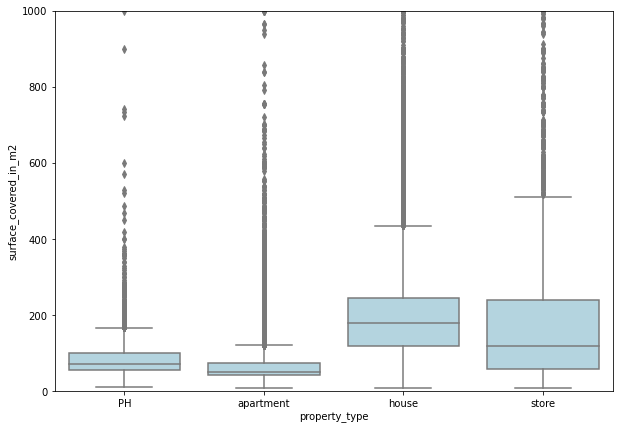

In [55]:
fig, axs = plt.subplots(figsize=(10,7))

sns.boxplot(data=data, y='surface_covered_in_m2', x='property_type',
               palette=["lightblue"])
plt.ylim(0,1000)

(0.0, 700.0)

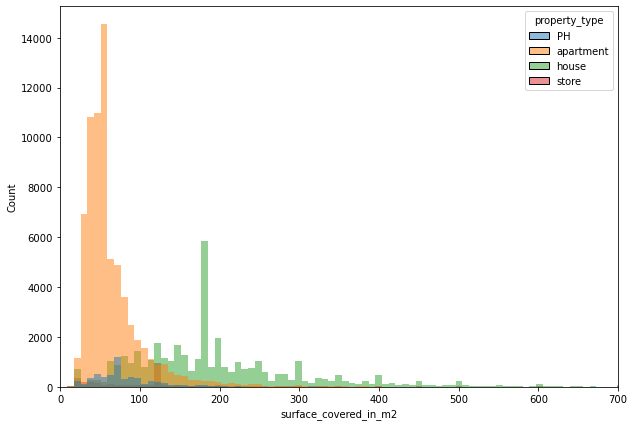

In [56]:
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data= data,x='surface_covered_in_m2', hue='property_type', bins=50000, color='k')
plt.xlim(0,700)

In [58]:
price_x_sup = data.price/data.surface_covered_in_m2
data['price_x_sup'] = price_x_sup

(0.0, 8000.0)

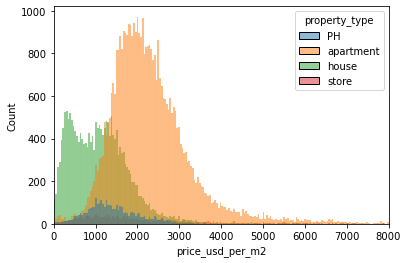

In [59]:
sns.histplot(data= data,x='price_usd_per_m2', hue='property_type', bins=5000, color='k')
plt.xlim(0,8000)

In [ ]:
sns.histplot(data= data,x='price_x_sup', hue='property_type', bins=50000, color='k')
plt.xlim(0,8000)

(0.0, 8000.0)

In [ ]:
sns.histplot(data= data,x='price_per_m2', hue='property_type', bins=50000, color='k')
plt.xlim(0,8000)